In [4]:
import tensorflow as tf

data = tf.keras.utils.image_dataset_from_directory('./img', image_size=(240, 240))
class_names = data.class_names

Found 825 files belonging to 3 classes.


In [5]:
class_names

['adidas', 'converse', 'nike']

In [6]:
data = data.map(lambda x, y: (x/255, y))
len(data)

26

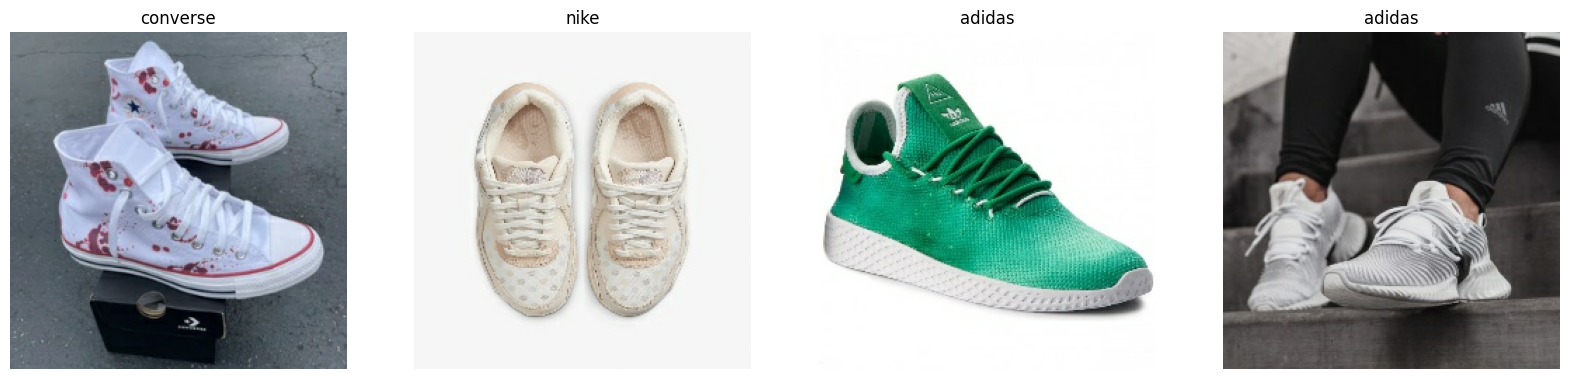

In [33]:
import matplotlib.pyplot as plt

data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].axis('off')
    ax[idx].title.set_text(class_names[batch[1][idx]])

In [34]:
len(data)

26

In [35]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size).skip(val_size).take(test_size)

In [36]:
len(train), len(val), len(test)

(18, 5, 3)

In [37]:
def buildModel():
  model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer((240, 240, 3)),

  tf.keras.layers.Conv2D(16, 3, activation='relu', kernel_initializer='he_normal'),
  tf.keras.layers.MaxPool2D(),

  tf.keras.layers.Conv2D(16, 3, activation='relu', kernel_initializer='he_normal'),
  tf.keras.layers.MaxPool2D(),

  tf.keras.layers.Conv2D(16, 3, activation='relu', kernel_initializer='he_normal'),
  tf.keras.layers.MaxPool2D(),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(3, activation='softmax')
])

  model.compile(optimizer='nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  return model


In [38]:
model = buildModel()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 238, 238, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 119, 119, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 117, 117, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 58, 58, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 16)        0

In [40]:
model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
18/18 [==============================] - 1s 31ms/step - loss: 0.8825 - accuracy: 0.6181 - val_loss: 0.7931 - val_accuracy: 0.6875
Epoch 2/20
18/18 [==============================] - 1s 33ms/step - loss: 0.7417 - accuracy: 0.7153 - val_loss: 0.6597 - val_accuracy: 0.8000
Epoch 3/20
18/18 [==============================] - 1s 32ms/step - loss: 0.6025 - accuracy: 0.7743 - val_loss: 0.6349 - val_accuracy: 0.7625
Epoch 4/20
18/18 [==============================] - 1s 31ms/step - loss: 0.4611 - accuracy: 0.8368 - val_loss: 0.4967 - val_accuracy: 0.8125
Epoch 5/20
18/18 [==============================] - 1s 31ms/step - loss: 0.3560 - accuracy: 0.8872 - val_loss: 0.6576 - val_accuracy: 0.7688
Epoch 6/20
18/18 [==============================] - 1s 32ms/step - loss: 0.3109 - accuracy: 0.9115 - val_loss: 0.4032 - val_accuracy: 0.8625
Epoch 7/20
18/18 [==============================] - 1s 32ms/step - loss: 0.2406 - accuracy: 0.9358 - val_loss: 0.3153 - val_accuracy: 0.8562
Epoch 8/20
18

In [41]:
model.evaluate(test)

3/3 [==============================] - 0s 96ms/step - loss: 0.1013 - accuracy: 0.9775


[0.10131821036338806, 0.9775280952453613]

1/1 [==============================] - 0s 13ms/step


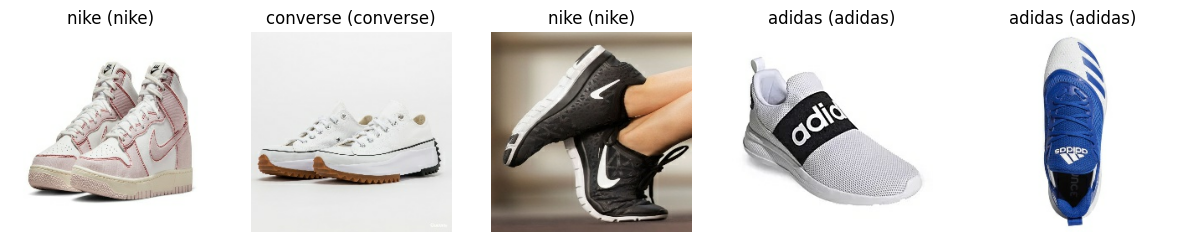

In [46]:
import numpy as np

count = 5
temp = test.unbatch().take(count).as_numpy_iterator()
lst = list(temp)

fig, axes = plt.subplots(1, count, figsize=(15, 3))

for idx, (img, label) in enumerate(lst):
  axes[idx].imshow(img)
  axes[idx].axis('off')
  
  prediction = model.predict(np.expand_dims(img, axis=0))
  pred_label = class_names[prediction.argmax()]

  axes[idx].set_title(f"{pred_label} ({class_names[label]})")


In [47]:
model.save('saved_model/v1')

INFO:tensorflow:Assets written to: saved_model/v1/assets


INFO:tensorflow:Assets written to: saved_model/v1/assets


In [48]:
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model, 'tfjs')

/home/wtongze/miniconda3/envs/tf/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
